## 1. Bitcoin Market Description and Data Loading

<p>*<sup>1</sup> <strong>WARNING</strong>: The cryptocurrency market is exceptionally volatile and any money you put in might disappear into thin air.  Cryptocurrencies mentioned here <strong>might be scams</strong> similar to <a href="https://en.wikipedia.org/wiki/Ponzi_scheme">Ponzi Schemes</a> or have many other issues (overvaluation, technical, etc.). <strong>Please do not mistake this for investment advice</strong>. *</p>
<p>That said, let's get to business. As a first task, we will load the current data from the <a href="https://api.coinmarketcap.com">coinmarketcap API</a> and display it in the output.</p>

In [130]:
#Importing pandas
import pandas as pd

#Import matplotlib and setting asthetics for plotting later.
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('fivethirtyeight')

#Reading in current data from coinmarketcap.com
current = pd.read_json("https://api.coinmarketcap.com/v1/ticker/")

#Printing out the first few lines
current.head()


,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,1.355186e+10,17964300,bitcoin,1569775053,144670699960,2.100000e+07,Bitcoin,0.33,-1.42,-19.74,1.000000,8053.233355,1,BTC,17964300
1,6.622403e+09,107943136,ethereum,1569775042,18369475869,NaN,Ethereum,1.63,-1.80,-19.01,0.021151,170.177342,2,ETH,107943136
2,8.967676e+08,43080011224,ripple,1569775024,10301746322,1.000000e+11,XRP,0.35,-1.37,-14.02,0.000030,0.239131,3,XRP,99991343356
3,1.639792e+10,4108044456,tether,1569775038,4131135322,NaN,Tether,-0.23,-0.42,0.25,0.000125,1.005621,4,USDT,4207771504
4,1.561543e+09,18029775,bitcoin-cash,1569775027,3986393092,2.100000e+07,Bitcoin Cash,1.99,-2.02,-27.89,0.027480,221.100546,5,BCH,18029775


## 2. Full dataset, filtering, and reproducibility
THe previous API call returns only the first 100 coins, and we want to explore as many coins as possible. Moreover, we can't produce reproducible analysis with live online data. To solve the problems, we will laod a CSV we conviently saved on the 6th of December of 2017 using the API call.

In [131]:
#Reading datasets/coinmarketcap_oI 6112017.csv into pandas
dec6 = pd.read_csv("datasets/coinmarketcap_06122017.csv")

#Selecting the 'id' and the 'market_cap_usd' columns
market_cap_raw = dec6[['id','market_cap_usd']]

#counting the number of values
market_cap_raw.count()

id                1326
market_cap_usd    1031
dtype: int64

## 3 Discard the cryptocurrencies without a market capitalization

Why do the <code>count()</code> for <code>id</code> and <code>market_cap_usd</code> differ above? It is because cryptocurrencies listed in coinmarketcap.com have no know market capitalization, this is represented by <code>NaN</code> in the Data, and <code>NaNs</code> are not counted by <code>count()</code>. These cryptocurrencies of little interest to us in this analysis, so they are safe to remove. 


In [132]:
#Filtering out rows without a market capitalization
cap = market_cap_raw.query('market_cap_usd > 0')

#Counting the number of values again 
cap.count()

id                1031
market_cap_usd    1031
dtype: int64

## 4. How big is Bitcoin compared with the rest of the cryptocurrencies?
At the time of writing, Bitcoin is under serious competition from other projects, but it is still dominant in market capitalization. Let's plot the market capitalization for the top 10 coins as a barplot to better visualize this. 

Text(0, 0.5, '% of total cap')

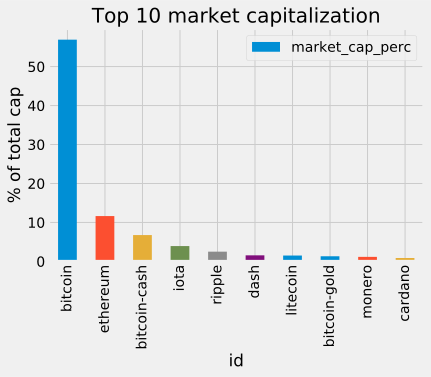

In [133]:
#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

#Selecting the first 10 rows an setting the index
cap10 = cap.head(10).set_index(cap.id[:10])  

#Calculating market_cap_perc
lambdaMarketPerc = lambda x: (x.market_cap_usd / cap.market_cap_usd.sum())*100
cap10 = cap10.assign(market_cap_perc = lambdaMarketPerc )

#Plotting the barplot with the title defined above   
ax = cap10.plot.bar(x = 'id',y='market_cap_perc', title = TOP_CAP_TITLE)

#Annotating the y axis with the label defined above
ax.set_ylabel(TOP_CAP_YLABEL)


## 5. Making the plot easier to read and more informative 
While the plot above is informative enough, it can be improved. Bitcoin is too big, and the other coins are hard to distinguish because of this. Instead of the percentage, let's use a <i>log</i><sup>10</sup> scale of thje "raw" capitalization. Plus, let's use color to group similar coins and make the plot more informative<sup>1</sup>. 

For the color rationale: bitcoin-cash and bitcoin-gold are forks of the bitcoin <a href="https://en.wikipedia.org/wiki/Blockchain">Blockchain</a><sup>2</sup>. Ethereum and Cardano both offer Turing Complete <a href="https://en.wikipedia.org/wiki/Smart_contract">smart contracts</a>. Iota and Ripple are not minable. Dash, Litecoin, and Monero get their own color. 

<sup>1</sup> <em>This coloring is a simplification. There are more differences and similarities that are not being represente here.</em>

<sup>2</sup> <em>The bitcoin forks are actually <b>very</b> differente, but it is out of scope to talk about them here. Please see the warning above and do your own research.</em>



Text(0.5, 0, '')

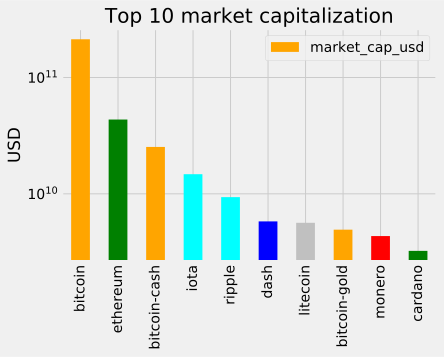

In [134]:
#Colors for the bar plot
COLORS = ['orange','green','orange','cyan','cyan','blue','silver','orange','red','green']

#Plotting market_cap_usd as before but adding the colors and scalling the y-axis
ax = cap10.plot.bar(x='id', y='market_cap_usd', color=COLORS, logy=True, title=TOP_CAP_TITLE)

#Annotating the y axis with 'USD'
ax.set_ylabel('USD')

#Final touch! Removing the xlabel as it is not very informative 
ax.set_xlabel('') 

## 6.What's going on? Volatility in Cryptocurrencies

The cryptocurrencies market has been spectacularly volatile since the first exchange opened. This notebook didn't start with a big, bold warning for nothing. Let's explore this volatility a bit more! We will begin by selecting and plotting the 24 hours and 7 days percentage change, which we already have available.

In [135]:
# Selecting the id, percent_change_24h and percent_change_7d columns
volatility = dec6[['id', 'percent_change_24h', 'percent_change_7d']]

# Setting the index to 'id' and dropping all NaN rows
volatility = volatility.set_index('id').dropna() 

# Sorting the DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values(by='percent_change_24h')

# Checking the first few rows
volatility.head() 

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


## 7. Well, we can already see that things are a bit crazy

It seems you can lose a lot of money quickly on cryptocurrencies. Let's. plot the top 10 biggest gainers and top 10 losers in market capitalization. 

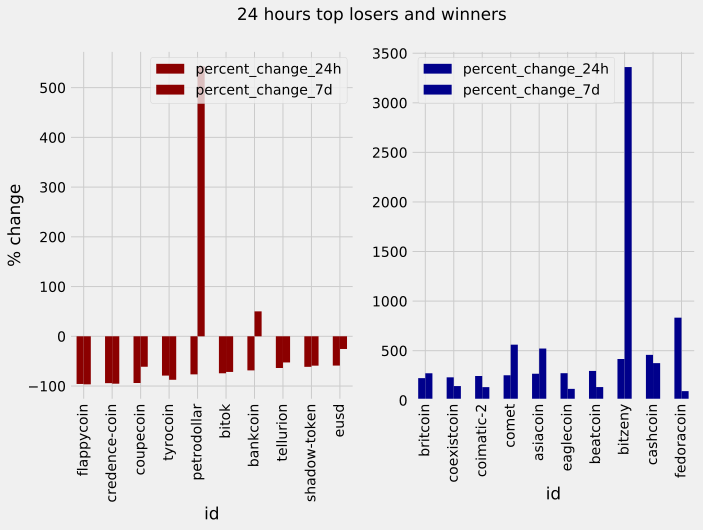

In [136]:
# Defining a function with 2 parameters, the series to plot and the title 
def top10_subplot(volatility_series, title):
        # Making the subplot and the figure for two side by side plots
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
        
        # Plotting with pandas the barchart for the top 10 losers
        ax = (volatility_series[:10].plot.bar(color='darkred', ax=axes[0]))
        
        # Setting the figure's main title to the text passed as parameter
        fig.suptitle(title)
        # Setting the ylabel to '% change'
        ax.set_ylabel('% change')
               
        # Same as above, but for the top  10 winners
        ax = (volatility_series[-10:].plot.bar(color='darkblue', ax=axes[1]))
                      
        # Returning this for good practice, might use later
        return fig, ax 
                      
DTITLE = "24 hours top losers and winners"
        
# Calling the function above with the 24 hours period series and title DTITLE               
fig, ax = top10_subplot(volatility,DTITLE) 
                      

## 8. Ok, those are... interesting. Let's check the weekly Series too.
800% daily increase?! Why are we doin this tutorial and not buying random coins?<sup>1</sup>

After calming dow, let's reuse the function defined above to see what is going weekly instead of daily. 

<em><sup>1</sup> Please take a moment to understand the implications of the red plots on how much value some cryptocurrencies lose in such short periods of time. </em>

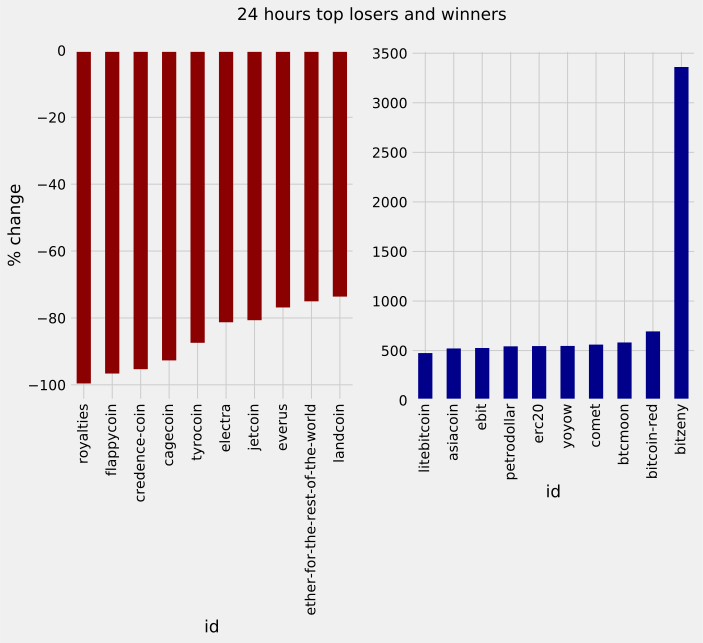

In [137]:
# Sorting in asceding order
volatility7d = volatility.sort_values(by='percent_change_7d', ascending=True)

WTITLE =  'Weekly top losers and winners'

# Calling the top10_subplot function
fig, ax = top10_subplot(volatility7d.percent_change_7d,DTITLE) 

## 9. How small is small?
The names of the cryptocurrencies above are quite unknown, and there is a considerable fluctuation between the 1 and 7 days percentage changes. As with stocks, and many other financial products, the smaller the capitalization, the bigger the risk and reward. Smaller cryptocurrencies are less stable projects in general, and therefore even riskier investments than the bigger ones<sup>1</sup>/ Let's classify our dataset based on Inverstopedia's capitalization <a href="https://www.investopedia.com/video/play/large-cap/">definitions</a> for company stocks.

<sup>1</sup><em> Cryptocurrencies are a new asset class, so they are not directly comparablee to stocks. Furthermore, there are no limits set in stone for what a 'small' or 'large' stock is. Finnaly, some investors argue that bitcoin is similar to gold, this would make them more comparable to a  <a href="https://www.investopedia.com/terms/c/commodity.asp">commodity</a> commodity instead. </em>


In [138]:
# Selecting everything bigger than 10 billion
largecaps = cap.query('market_cap_usd > 50000000 and market_cap_usd < 300000000')

# Printing out largecaps
largecaps

,id,market_cap_usd
39,veritaseum,293207270.0
40,dogecoin,291381251.0
41,siacoin,286625310.0
42,golem-network-tokens,284913605.0
43,maidsafecoin,283377459.0
44,pivx,272915025.0
45,tenx,264436219.0
46,binance-coin,243443742.0
47,status,242604169.0
48,power-ledger,233054177.0


## 10. Most coins are tiny 
Note that many coins are not comparable to large companies in market cap, so let's divert from the original Investopedia definition by merging categories.

<i>This is all for now</i>. Thanks for completining this project

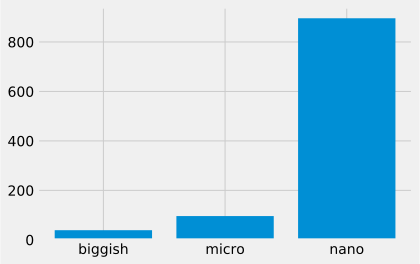

In [139]:
# Making a nice function for counting different marketcaps from the 
# 'cap' DataFrame. Returns an int.
# 

def capcount(query_string):
    return cap.query(query_string).count().id

# Labels for the plot
LABELS = ['biggish','micro','nano']

# Using capcount count the biggish cryptos
biggish = capcount('market_cap_usd > 300000000')

# Same as above for micro
micro = capcount('market_cap_usd > 50000000 and market_cap_usd < 300000000')

# Same as above for nano
nano = capcount('market_cap_usd < 50000000')

# Making a list with the 3 counts
values = [biggish, micro, nano]

# Plotting them with matplotlib
ax = plt.bar(LABELS, values)